In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("customer_churn_data 2.0.csv")


In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [5]:
df["InternetService"] = df["InternetService"].fillna("")

In [6]:
df.isna().sum().sum()

0

In [7]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,None,2208.32,No,Yes


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [10]:
numeric_columns_data = df.select_dtypes( include=["number"])

In [11]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [12]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

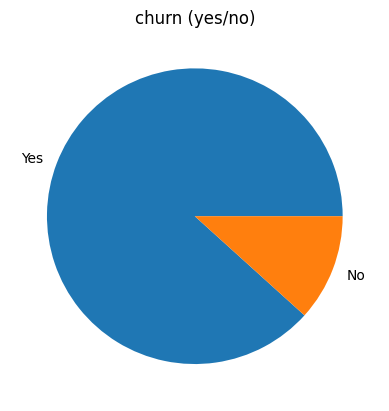

In [13]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("churn (yes/no)")
plt.ylabel("")
plt.show

In [14]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [15]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [16]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [17]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [19]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

At the lower terms we can see that the monthly charge average decreases

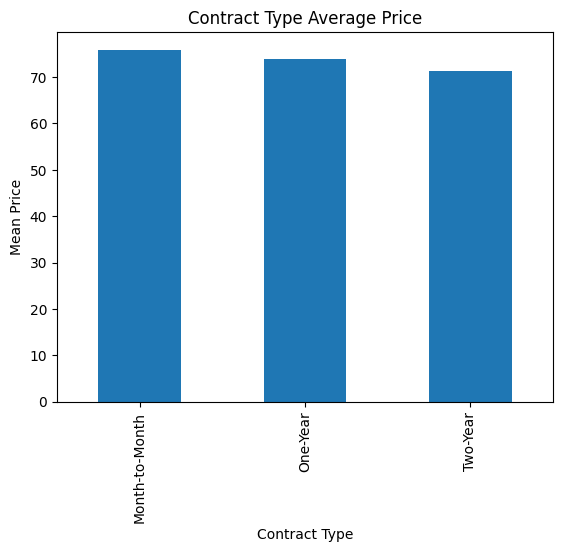

In [20]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

In [21]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


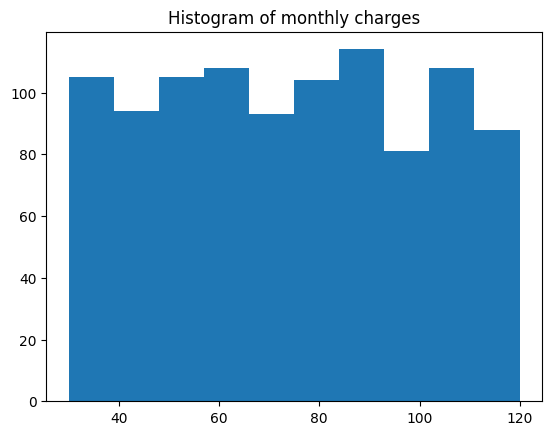

In [22]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of monthly charges")
plt.show()

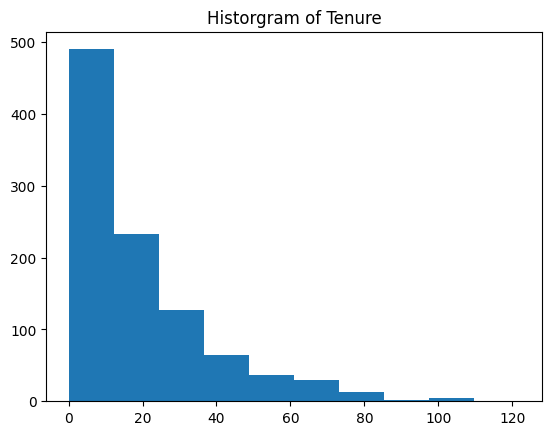

In [23]:
plt.hist(df["Tenure"])
plt.title("Historgram of Tenure")
plt.show()

above steps I completed analysis by starting by loading my data, checekd for NA and duplicated values, we took a look of summaries and correlation, correlation values and created cahrts from value counts, groubys and created histrogram and now i start modeling by Feature Engineering so by selecting columns to use for modeling.

In [24]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

we will be making predictors for model

In [25]:
y = df[["Churn"]]
x = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [26]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [27]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


The above are the predictors for x and y which will be used for predicting, now I need numeric values for both X and Y as few columns like gender do not have numeric values, for that Female will be 1 amd Male will be 0

In [28]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\arpita\AppData\Local\Temp\ipykernel_12612\2979086490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [29]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [30]:
type(x["Gender"][0])

numpy.int64

In [31]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\arpita\AppData\Local\Temp\ipykernel_12612\3691775968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


for gender 1 is female 0 is male and churn 1 is yes and 0 is no. this information will be used for coding the  streamlit app

In [32]:
type(y["Churn"][0])

numpy.int64

In [33]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [34]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


now i will begin with train test split this model evaluation using python library scikitleanr

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1. Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 2. Apply SMOTE to training data only
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


this means 20% data will ne in testing set and 80% will be used in training. x_train,y_train is training set. x_test,y_test is testing set. i will train our model with x_train,y_train . prediction will be done with the model we trained using x_test and compare the predictions with y_test.

In [36]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


As we can notice there is different data points range in each columns , so i will be changing it bby scaling the data points below

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)

In [40]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

scaler is exported as scaler.pkl

In [41]:
x_test = scaler.transform(x_test)

the data is scaled now,we will be building now classification model

In [42]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

accuracy score is going to be the metric for evaluating the classsification model. It takes values from between 0 and 1 and the value closer to 1 is better. we will be starting with logistic regression

In [43]:
from sklearn.model_selection import GridSearchCV

we will be doing hyper parameter tuning on models like decision tree or random forest so gridserachcv is used for hyper parameter tuning

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()

we have initialise the logistic regression above

In [46]:
import warnings
warnings.filterwarnings("ignore")

now we will be training our model

In [47]:
log_model.fit(x_train, y_train)

LogisticRegression()

the model is trained successfully!now model can easy do predictions. we can do predictions by using .predict method

In [48]:
y_pred = log_model.predict(x_test)

the predictions for x_test, the test data is stored in y_pred . the y_test is the true values which will be compared with y_pred 

In [49]:
modelperformance(y_pred)

Accuracy score on model is 0.715


this is a high score in prediction which is a goood score. now we will be continuing with k neighbours classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier

we are not training the base model instead we're doing hyperparameter tuning for optimizing the parameters

In [51]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform","distance"]
}

In [52]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5)

cross validation is going to split our data into 5 folds and this data will be trainedusing training dataset

In [53]:
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [54]:
gridkn.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [55]:
y_pred = gridkn.predict(x_test)

In [56]:
modelperformance(y_pred)

Accuracy score on model is 0.75


logistic regression and knearest neighbour classifier performs same next we will try support vector classifier

In [57]:
from sklearn.svm import SVC

we will be hyperparameter tuning for getting the best performance possible

In [58]:
svm = SVC()

In [59]:
param_grid = {
    "C": [0.01,0.1,0.5,1],
    "kernel": ["linear","rbf","poly"]
}

In [60]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [61]:
gridsvc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [62]:
gridsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [63]:
y_pred = gridsvc.predict(x_test)

In [64]:
modelperformance(y_pred)

Accuracy score on model is 0.725


it beats both logistic regression and knoeighbours classifier. i will continue with tree based models starting with decision tree classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
param_grid = {
    "criterion": ["gini","entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1, 2, 4]
}

In [67]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [68]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [69]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [70]:
y_pred = grid_tree.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [71]:
modelperformance(y_pred)

Accuracy score on model is 0.845


the prediction is lower than svc. not we will train using random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier


In [73]:
rfc_model = RandomForestClassifier()

In [74]:
param_grid = {
    "n_estimators": [32,64,128,256],
    "max_features": [2,3,4],
    "bootstrap": [True,False]
}

In [75]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv = 5)

In [76]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [77]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [78]:
y_pred = grid_rfc.predict(x_test)

In [79]:
modelperformance(y_pred)

Accuracy score on model is 0.815


the svc has 0.88 and rfc has 0.885

In [80]:
best_model = grid_rfc.best_estimator_

In [81]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

model is exported as model.pkl
order of the x is Age', 'Gender', 'Tenure', 'MonthlyCharges

In [82]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

ML : first selected y and x as the predictors
encoded categorical values by changing gender and churn 's yes and no to numerical values
then we implied train test split setting training and test sizes. test size as 0.2 and scaled our training data after scaling we exported our scaler for not having data leakage. we scaled our test values and defined function to get accuracy score with prediction from the models
we trained logistic models, trained k neighbours classifier model, trained support vector classifier model , decision tree classifier model, random forest classifier model  and the best accuracy score was given by Random Forest Classifier model.
so we exported i using joblib dump method as model.pkl as pickle.


now we will create an interface for users to get predictions from our model users going to enter their values and they're going to get the information about churn or not based on the values of age, gender and tenure.